In [683]:
import numpy as np
import os, tempfile
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import sklearn.metrics as metrics
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [545]:
pd17 = pd.read_csv("./data/2017nfldata.csv")
pd18 = pd.read_csv("./data/2018nfldata.csv")
pd19 = pd.read_csv("./data/2019nfldata.csv")
pd20 = pd.read_csv("./data/2020nfldata.csv")
pd21 = pd.read_csv("./data/2021nfldata.csv")

In [546]:
pd19.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Christian McCaffrey*+,CAR,RB,23,16,16,0,2,0,...,1.0,NaN,355.0,471.2,477.2,413.2,215.0,1,1.0,McCaCh01
1,2,Lamar Jackson*+,BAL,QB,22,15,15,265,401,3127,...,NaN,NaN,416.0,415.7,429.7,421.7,152.0,1,2.0,JackLa00
2,3,Derrick Henry *,TEN,RB,25,15,15,0,0,0,...,NaN,NaN,277.0,294.6,303.6,285.6,136.0,2,3.0,HenrDe00


In [547]:
pd20.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Derrick Henry *+,TEN,RB,26,16,16,0,0,0,...,1.0,NaN,314.0,333.1,341.1,323.6,184.0,1,1.0,HenrDe00
1,2,Alvin Kamara*,NOR,RB,25,15,10,0,0,0,...,NaN,NaN,295.0,377.8,383.8,336.3,165.0,2,2.0,KamaAl00
2,3,Dalvin Cook*,MIN,RB,25,14,14,0,0,0,...,3.0,NaN,294.0,337.8,346.8,315.8,164.0,3,3.0,CookDa01


In [548]:
pd21.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Jonathan Taylor*+,IND,RB,22,17,17,0.0,0.0,0.0,...,NaN,NaN,333.0,373.1,381.1,353.1,187.0,1,1.0,TaylJo02
1,2,Cooper Kupp*+,LAR,WR,28,17,17,0.0,1.0,0.0,...,1.0,NaN,295.0,439.5,442.5,367.0,173.0,1,2.0,KuppCo00
2,3,Deebo Samuel*+,SFO,WR,25,16,15,1.0,2.0,24.0,...,NaN,NaN,262.0,339.0,347.0,300.5,140.0,2,3.0,SamuDe00


In [549]:
for col in pd17.columns:
    print(col)

Rk
Player
Tm
FantPos
Age
G
GS
Cmp
Att
Yds
TD
Int
Att.1
Yds.1
Y/A
TD.1
Tgt
Rec
Yds.2
Y/R
TD.2
Fmb
FL
TD.3
2PM
2PP
FantPt
PPR
DKPt
FDPt
VBD
PosRank
OvRank
-9999


In [550]:
for col in pd18.columns:
    print(col)

Rk
Player
Tm
FantPos
Age
G
GS
Cmp
Att
Yds
TD
Int
Att.1
Yds.1
Y/A
TD.1
Tgt
Rec
Yds.2
Y/R
TD.2
Fmb
FL
TD.3
2PM
2PP
FantPt
PPR
DKPt
FDPt
VBD
PosRank
OvRank
-9999


In [551]:
pd17 = pd17.drop(columns=['Rk', 'Tm', 'Player', 'FantPos', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd18 = pd18.drop(columns=['Rk', 'Tm', 'Player', 'FantPos' , 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd19 = pd19.drop(columns=['Rk', 'Tm', 'Player', 'FantPos' , 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd20 = pd20.drop(columns=['Rk', 'Tm', 'Player', 'FantPos' , 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd21 = pd21.drop(columns=['Rk', 'Tm', 'Player', 'FantPos' , 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])

In [552]:
pd17.fillna(0, inplace=True)
pd18.fillna(0, inplace=True)
pd19.fillna(0, inplace=True)
pd20.fillna(0, inplace=True)
pd21.fillna(0, inplace=True)


In [553]:
pd17.head()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999
0,23,15,15,0,0,0,0,0,279,1305,...,788,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01
1,25,15,15,0,0,0,0,0,321,1291,...,655,7.71,2,3.0,2,11,0.0,0.0,341.6,BellLe00
2,22,16,16,0,0,0,0,0,272,1327,...,455,8.58,3,1.0,1,11,0.0,0.0,295.2,HuntKa00
3,22,16,3,0,0,0,0,0,120,728,...,826,10.20,5,1.0,1,14,1.0,0.0,320.4,KamaAl00
4,24,16,16,0,0,0,0,0,284,1105,...,476,8.21,4,1.0,0,12,0.0,0.0,288.1,GordMe00


In [554]:
pd18.head()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999
0,24,14,14,0,0,0,0,0,256,1251,...,580,9.83,4,1.0,1,21,3.0,0.0,372.1,GurlTo01
1,21,16,16,0,0,0,0,0,261,1307,...,721,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00
2,22,16,16,1,1,50,1,0,219,1098,...,867,8.10,6,4.0,1,13,0.0,0.0,385.5,McCaCh01
3,23,15,13,0,0,0,0,0,194,883,...,709,8.75,4,1.0,0,18,3.0,0.0,354.2,KamaAl00
4,23,16,16,383,580,5097,50,12,60,272,...,0,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00


In [555]:
pd17target = pd18[['PPR','-9999']]

In [556]:
pd17target.head()

,PPR,-9999
0,372.1,GurlTo01
1,385.8,BarkSa00
2,385.5,McCaCh01
3,354.2,KamaAl00
4,417.1,MahoPa00


In [557]:
pd18target = pd19[['PPR','-9999']]
pd19target = pd20[['PPR','-9999']]
pd20target = pd21[['PPR','-9999']]


In [558]:
pd17target.rename(columns={'PPR':'PPRtarget'}, inplace=True)

C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [559]:
pd17target.head()

,PPRtarget,-9999
0,372.1,GurlTo01
1,385.8,BarkSa00
2,385.5,McCaCh01
3,354.2,KamaAl00
4,417.1,MahoPa00


In [560]:
pd18target.rename(columns={'PPR':'PPRtarget'}, inplace=True)
pd19target.rename(columns={'PPR':'PPRtarget'}, inplace=True)
pd20target.rename(columns={'PPR':'PPRtarget'}, inplace=True)

C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [561]:
pd18target.head()

,PPRtarget,-9999
0,471.2,McCaCh01
1,415.7,JackLa00
2,294.6,HenrDe00
3,314.8,JoneAa00
4,311.7,ElliEz00


In [562]:
pd17final = pd17.merge(pd17target,how='left', left_on='-9999', right_on='-9999')

In [563]:
pd17final.head()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,23,15,15,0,0,0,0,0,279,1305,...,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01,372.1
1,25,15,15,0,0,0,0,0,321,1291,...,7.71,2,3.0,2,11,0.0,0.0,341.6,BellLe00,NaN
2,22,16,16,0,0,0,0,0,272,1327,...,8.58,3,1.0,1,11,0.0,0.0,295.2,HuntKa00,230.2
3,22,16,3,0,0,0,0,0,120,728,...,10.20,5,1.0,1,14,1.0,0.0,320.4,KamaAl00,354.2
4,24,16,16,0,0,0,0,0,284,1105,...,8.21,4,1.0,0,12,0.0,0.0,288.1,GordMe00,275.5


In [564]:
pd18final = pd18.merge(pd18target,how='left', left_on='-9999', right_on='-9999')
pd19final = pd19.merge(pd19target,how='left', left_on='-9999', right_on='-9999')
pd20final = pd20.merge(pd20target,how='left', left_on='-9999', right_on='-9999')

In [565]:
df_final = pd.DataFrame().append([pd18final,pd19final, pd20final, pd17final])

In [566]:
df_final.head()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,24,14,14,0,0,0,0,0,256,1251,...,9.83,4,1.0,1,21,3.0,0.0,372.1,GurlTo01,219.4
1,21,16,16,0,0,0,0,0,261,1307,...,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00,244.1
2,22,16,16,1,1,50,1,0,219,1098,...,8.10,6,4.0,1,13,0.0,0.0,385.5,McCaCh01,471.2
3,23,15,13,0,0,0,0,0,194,883,...,8.75,4,1.0,0,18,3.0,0.0,354.2,KamaAl00,248.5
4,23,16,16,383,580,5097,50,12,60,272,...,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00,287.0


In [567]:
df_final = df_final.sort_values('PPR', ascending=False)

In [568]:
df_final.head(20)

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,23,16,16,0,2,0,0,0,287,1387,...,8.66,4,1.0,0,19,1.0,0.0,471.2,McCaCh01,90.4
4,23,16,16,383,580,5097,50,12,60,272,...,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00,287.0
1,22,15,15,265,401,3127,36,6,176,1206,...,0.00,0,9.0,2,7,0.0,0.0,415.7,JackLa00,332.8
6,24,16,16,396,572,4544,37,10,102,421,...,12.00,1,9.0,6,9,0.0,0.0,396.1,AlleJo02,402.6
1,21,16,16,0,0,0,0,0,261,1307,...,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00,244.1
2,22,16,16,1,1,50,1,0,219,1098,...,8.10,6,4.0,1,13,0.0,0.0,385.5,McCaCh01,471.2
0,23,15,15,0,0,0,0,0,279,1305,...,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01,372.1
7,37,16,16,372,526,4299,48,5,38,149,...,-6.00,0,4.0,2,3,0.0,0.0,383.3,RodgAa00,333.3
8,23,16,16,375,558,3971,26,12,133,819,...,0.00,0,9.0,4,11,0.0,0.0,378.7,MurrKy00,300.5
1,25,15,10,0,0,0,0,0,187,932,...,9.11,5,1.0,0,21,0.0,0.0,377.8,KamaAl00,234.7


In [569]:
df_final = df_final[df_final['PPR'] > 50]  

In [570]:
df_final = df_final.dropna(subset = ['PPR'])

In [571]:
df_final = df_final.dropna(subset = ['PPRtarget'])

In [572]:
df_final.shape

(982, 25)

In [573]:
df_final.head(20)

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,23,16,16,0,2,0,0,0,287,1387,...,8.66,4,1.0,0,19,1.0,0.0,471.2,McCaCh01,90.4
4,23,16,16,383,580,5097,50,12,60,272,...,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00,287.0
1,22,15,15,265,401,3127,36,6,176,1206,...,0.00,0,9.0,2,7,0.0,0.0,415.7,JackLa00,332.8
6,24,16,16,396,572,4544,37,10,102,421,...,12.00,1,9.0,6,9,0.0,0.0,396.1,AlleJo02,402.6
1,21,16,16,0,0,0,0,0,261,1307,...,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00,244.1
2,22,16,16,1,1,50,1,0,219,1098,...,8.10,6,4.0,1,13,0.0,0.0,385.5,McCaCh01,471.2
0,23,15,15,0,0,0,0,0,279,1305,...,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01,372.1
7,37,16,16,372,526,4299,48,5,38,149,...,-6.00,0,4.0,2,3,0.0,0.0,383.3,RodgAa00,333.3
8,23,16,16,375,558,3971,26,12,133,819,...,0.00,0,9.0,4,11,0.0,0.0,378.7,MurrKy00,300.5
1,25,15,10,0,0,0,0,0,187,932,...,9.11,5,1.0,0,21,0.0,0.0,377.8,KamaAl00,234.7


In [574]:
df_final.fillna(0, inplace=True)

In [575]:
df_final = df_final.drop(columns=['-9999'])

In [576]:
df_final.isna().sum()

Age          0
G            0
GS           0
Cmp          0
Att          0
Yds          0
TD           0
Int          0
Att.1        0
Yds.1        0
Y/A          0
TD.1         0
Tgt          0
Rec          0
Yds.2        0
Y/R          0
TD.2         0
Fmb          0
FL           0
TD.3         0
2PM          0
2PP          0
PPR          0
PPRtarget    0
dtype: int64

In [577]:
df_final.shape

(982, 24)

In [578]:
df_final.head(20)

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,PPRtarget
0,23,16,16,0,2,0,0,0,287,1387,...,1005,8.66,4,1.0,0,19,1.0,0.0,471.2,90.4
4,23,16,16,383,580,5097,50,12,60,272,...,0,0.00,0,9.0,2,2,1.0,0.0,417.1,287.0
1,22,15,15,265,401,3127,36,6,176,1206,...,0,0.00,0,9.0,2,7,0.0,0.0,415.7,332.8
6,24,16,16,396,572,4544,37,10,102,421,...,12,12.00,1,9.0,6,9,0.0,0.0,396.1,402.6
1,21,16,16,0,0,0,0,0,261,1307,...,721,7.92,4,0.0,0,15,1.0,0.0,385.8,244.1
2,22,16,16,1,1,50,1,0,219,1098,...,867,8.10,6,4.0,1,13,0.0,0.0,385.5,471.2
0,23,15,15,0,0,0,0,0,279,1305,...,788,12.31,6,5.0,2,19,0.0,0.0,383.3,372.1
7,37,16,16,372,526,4299,48,5,38,149,...,-6,-6.00,0,4.0,2,3,0.0,0.0,383.3,333.3
8,23,16,16,375,558,3971,26,12,133,819,...,0,0.00,0,9.0,4,11,0.0,0.0,378.7,300.5
1,25,15,10,0,0,0,0,0,187,932,...,756,9.11,5,1.0,0,21,0.0,0.0,377.8,234.7


In [579]:
df_final.tail()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,PPRtarget
288,27,13,0,0,0,0,0,0,22,123,...,138,7.26,0,1.0,0,1,0.0,0.0,51.1,23.2
255,23,16,11,0,0,0,0,0,0,0,...,198,15.23,3,0.0,0,3,0.0,0.0,50.8,69.6
278,28,12,12,0,0,0,0,0,3,7,...,239,11.95,1,0.0,0,1,0.0,0.0,50.6,81.6
314,24,15,11,0,0,0,0,0,0,0,...,203,7.25,0,0.0,0,0,1.0,0.0,50.3,44.3
252,22,10,1,0,0,0,0,0,0,0,...,201,16.75,3,0.0,0,3,0.0,0.0,50.1,74.3


## Correlation Between Variables in Dataset

In [580]:
trainset = X_train.join(y_train)

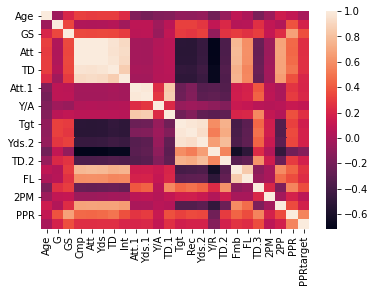

In [581]:
sns.heatmap(trainset.corr());

In [582]:
trainset.corr()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,PPRtarget
Age,1.000000,-0.038725,0.203566,0.311954,0.302203,0.305322,0.308545,0.231033,-0.159164,-0.194629,...,-0.075469,-0.217403,-0.067737,0.094594,0.018190,-0.180917,-0.045994,0.150864,0.107863,-0.003322
G,-0.038725,1.000000,0.338867,0.028844,0.021873,0.033356,0.054662,-0.031130,0.083432,0.083986,...,0.280067,0.098400,0.217173,0.054146,0.055226,0.250458,0.097768,0.039974,0.379712,0.183983
GS,0.203566,0.338867,1.000000,0.343646,0.340996,0.344603,0.342716,0.296661,0.072654,0.077676,...,0.320499,-0.082675,0.268734,0.296582,0.256687,0.303459,0.111673,0.242778,0.672224,0.368966
Cmp,0.311954,0.028844,0.343646,1.000000,0.998166,0.996361,0.961840,0.918541,-0.015549,-0.022812,...,-0.463172,-0.710294,-0.367305,0.771868,0.599951,-0.257545,-0.047438,0.683835,0.459750,0.245790
Att,0.302203,0.021873,0.340996,0.998166,1.000000,0.994817,0.956567,0.929511,-0.015549,-0.021442,...,-0.466842,-0.715404,-0.370217,0.780119,0.605168,-0.260180,-0.046565,0.687579,0.452153,0.244956
Yds,0.305322,0.033356,0.344603,0.996361,0.994817,1.000000,0.969759,0.918081,-0.013940,-0.020828,...,-0.460296,-0.708099,-0.365086,0.775073,0.601474,-0.256619,-0.037875,0.682265,0.468837,0.249786
TD,0.308545,0.054662,0.342716,0.961840,0.956567,0.969759,1.000000,0.859292,-0.004975,-0.008662,...,-0.433732,-0.679360,-0.344745,0.742158,0.565544,-0.242135,-0.023641,0.679425,0.500787,0.255099
Int,0.231033,-0.031130,0.296661,0.918541,0.929511,0.918081,0.859292,1.000000,-0.020347,-0.021068,...,-0.449018,-0.680489,-0.356944,0.752297,0.576727,-0.260365,-0.029342,0.651731,0.372466,0.203477
Att.1,-0.159164,0.083432,0.072654,-0.015549,-0.015549,-0.013940,-0.004975,-0.020347,1.000000,0.982593,...,-0.329697,-0.313678,-0.342859,0.151972,0.187368,0.396466,0.069747,0.007555,0.275323,0.202423
Yds.1,-0.194629,0.083986,0.077676,-0.022812,-0.021442,-0.020828,-0.008662,-0.021068,0.982593,1.000000,...,-0.306022,-0.292612,-0.319230,0.160173,0.190821,0.434723,0.084626,0.014392,0.302871,0.214579


In [583]:
cr = trainset.corr()
cr = cr[cr < 1]

In [584]:
cr.unstack().sort_values(ascending=False)[:30]

Cmp    Att      0.998166
Att    Cmp      0.998166
Cmp    Yds      0.996361
Yds    Cmp      0.996361
       Att      0.994817
Att    Yds      0.994817
Yds.1  Att.1    0.982593
Att.1  Yds.1    0.982593
Tgt    Rec      0.977152
Rec    Tgt      0.977152
TD     Yds      0.969759
Yds    TD       0.969759
TD     Cmp      0.961840
Cmp    TD       0.961840
Yds.2  Tgt      0.956664
Tgt    Yds.2    0.956664
TD     Att      0.956567
Att    TD       0.956567
Rec    Yds.2    0.934241
Yds.2  Rec      0.934241
Att    Int      0.929511
Int    Att      0.929511
Cmp    Int      0.918541
Int    Cmp      0.918541
Yds    Int      0.918081
Int    Yds      0.918081
Yds.1  TD.1     0.861825
TD.1   Yds.1    0.861825
Int    TD       0.859292
TD     Int      0.859292
dtype: float64

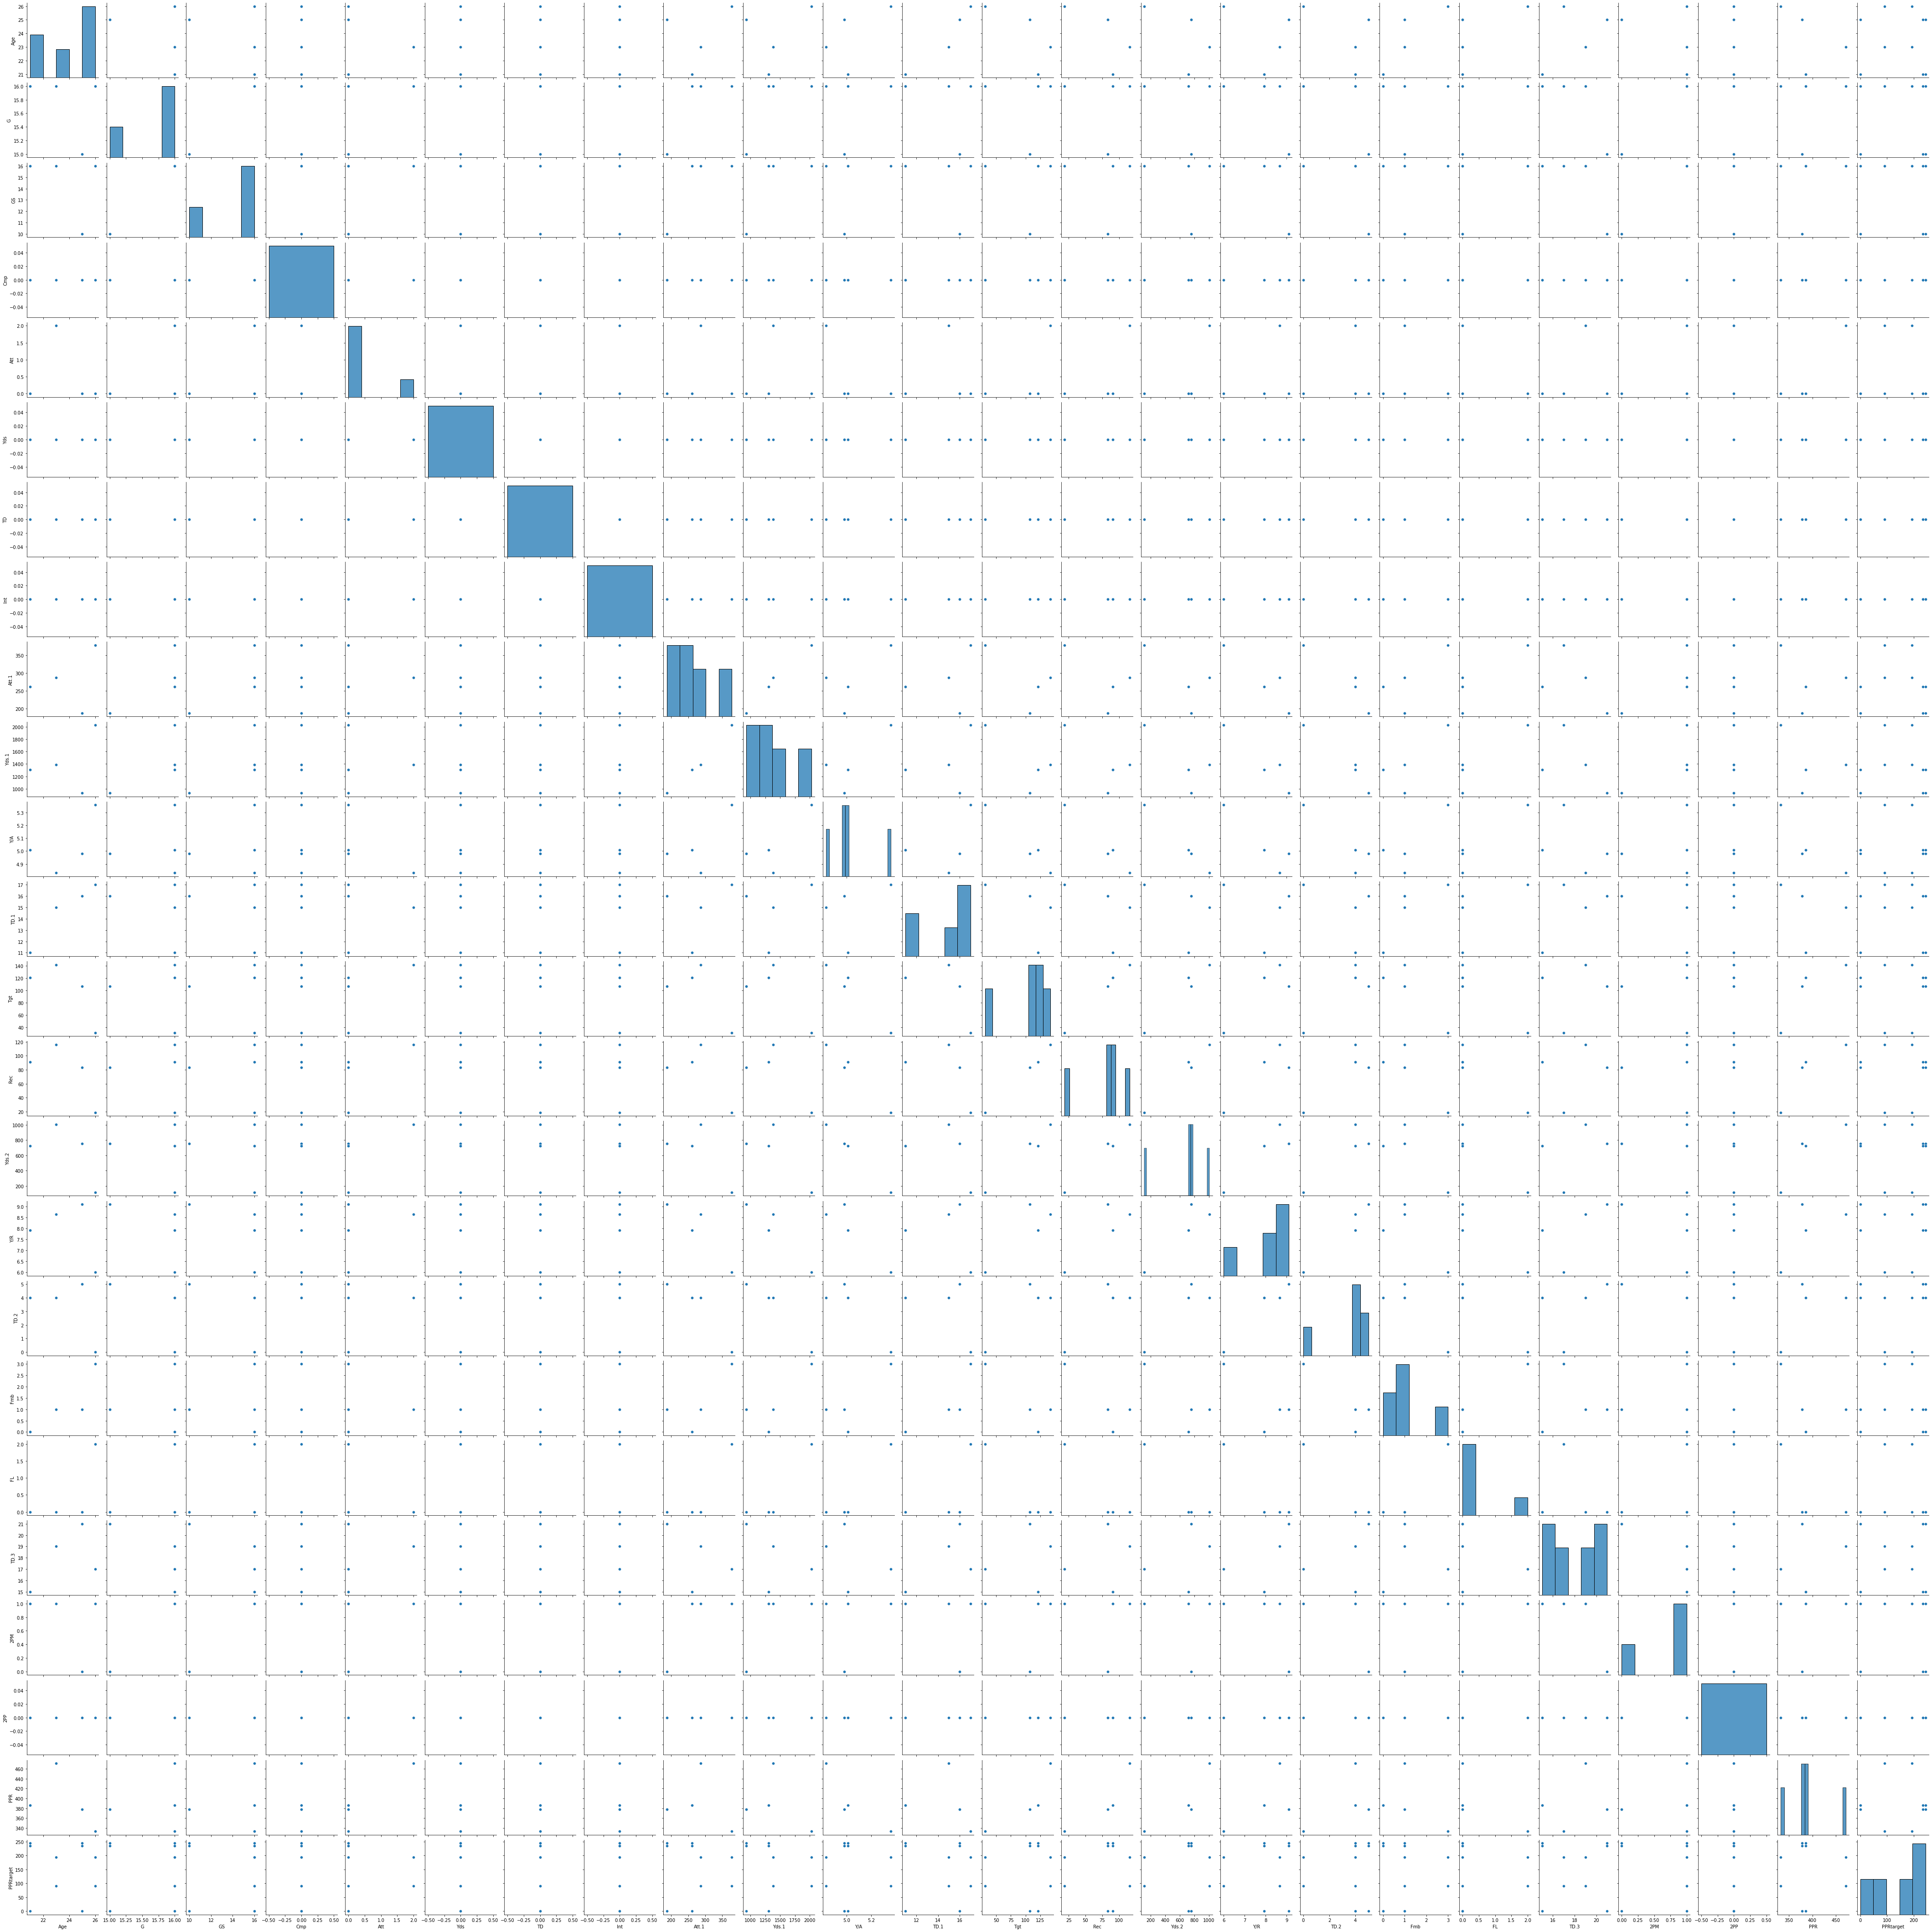

In [614]:
sns.pairplot(trainset.head(10))

## Train Test Split and Scaling our data for Modeling

In [586]:
X = df_final.drop(columns=['PPRtarget'])
y = df_final['PPRtarget']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [587]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train.value_counts(normalize=True)

0.0      0.011465
86.5     0.005096
240.0    0.005096
12.3     0.003822
85.0     0.003822
           ...   
56.2     0.001274
50.7     0.001274
135.6    0.001274
171.7    0.001274
173.6    0.001274
Name: PPRtarget, Length: 684, dtype: float64

## Dummy Model

In [588]:
dummy = DummyRegressor(strategy='mean')

In [589]:
dummy.fit(X_train_scaled, y_train)

DummyRegressor()

In [590]:
print(dummy.predict(y)[:10])

[133.48993631 133.48993631 133.48993631 133.48993631 133.48993631
 133.48993631 133.48993631 133.48993631 133.48993631 133.48993631]


Our Dummy model simple predicts the average fantasy point score of 133.8 for each player

## Linear Regression Simple Model

In [963]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [616]:
simple.score(X_train_scaled,y_train)

0.4501197514902804

In [669]:
lr_cv_results = cross_validate(simple, X_train_scaled, y_train, cv=5)

In [670]:
lr_cv_results

{'fit_time': array([0.00301003, 0.        , 0.00051498, 0.00099683, 0.00150728]),
 'score_time': array([0.        , 0.00099301, 0.00098968, 0.        , 0.        ]),
 'test_score': array([0.33099702, 0.40580861, 0.47035976, 0.30165261, 0.47075809])}

In [671]:
lr_test_scores = lr_cv_results['test_score']

In [672]:
lr_score = lr_test_scores.mean()
lr_score

0.3959152183283277

## Decision Tree Regressor

In [632]:
dt = DecisionTreeRegressor() 

dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [633]:
dt.score(X_train_scaled,y_train)

1.0

In [661]:
dt_cv_results = cross_validate(dt, X_train_scaled, y_train, cv=5)

In [662]:
dt_cv_results

{'fit_time': array([0.0054965 , 0.00549316, 0.00498676, 0.00498629, 0.00598359]),
 'score_time': array([0.00099373, 0.00099754, 0.0009973 , 0.00099778, 0.        ]),
 'test_score': array([-0.38674522, -0.15434904, -0.12287278, -0.18459869, -0.30918809])}

In [663]:
dt_test_scores = DT_cv_results['test_score']
dt_score = dt_test_scores.mean()
dt_score

-0.2456327299778501

## KNN Regressor

In [641]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train_scaled, y_train)



KNeighborsRegressor(n_neighbors=12)

In [642]:
knn.score(X_test, y_test)


-1.855451726418917

In [660]:
knn_cv_results = cross_validate(knn, X_train_scaled, y_train, cv=5)
knn_cv_results

{'fit_time': array([0.0044992 , 0.00210381, 0.00199556, 0.00199533, 0.00199366]),
 'score_time': array([0.00448918, 0.00498843, 0.00398874, 0.00498629, 0.00397229]),
 'test_score': array([0.27112319, 0.38559439, 0.34649217, 0.27814112, 0.35523267])}

In [644]:
knn_test_scores = knn_cv_results['test_score']
knn_score = knn_test_scores.mean()
knn_score

0.3157165340233587

## Random Forest Regressor

In [927]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
 

RandomForestRegressor()

In [928]:
rf.score(X_train_scaled,y_train)

0.9143573725641768

In [929]:
rf_cv_results = cross_validate(rf, X_train_scaled, y_train, cv=3)
rf_cv_results

{'fit_time': array([0.27028275, 0.27010441, 0.27439141]),
 'score_time': array([0.01563621, 0.00207949, 0.0080781 ]),
 'test_score': array([0.29954864, 0.45047068, 0.36379299])}

In [930]:
rf_test_scores = rf_cv_results['test_score']
rf_score = rf_test_scores.mean()
rf_score

0.37127077139583303

## Gradient Boost

In [931]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [932]:
gbr.score(X_train_scaled,y_train)

0.7116618722254073

In [933]:
gbr_cv_results = cross_validate(gbr, X_train_scaled, y_train, cv=3)
gbr_cv_results

{'fit_time': array([0.10014582, 0.1116147 , 0.09962535]),
 'score_time': array([0., 0., 0.]),
 'test_score': array([0.2813832 , 0.43606068, 0.35228807])}

In [934]:
gbr_test_scores = gbr_cv_results['test_score']
gbr_score = gbr_test_scores.mean()
gbr_score

0.35657731767406536

## Choosing Best Model

In [847]:
pd.DataFrame({'Linear Regression':[lr_score],
              'KNN Regression': [knn_score],
              'Random Forest Regressor': [rf_score],
               'Gradient Boost Regressor': [gbr_score]
             })

,Linear Regression,KNN Regression,Random Forest Regressor,Gradient Boost Regressor
0,0.395915,0.315717,0.337883,0.337043


It appears that the linear Regression model is the most accurate with untuned parameters, followed by RF and Gradient Boost. 

## Applying GridSearch

In [997]:
lr_parameters = {'fit_intercept': [True, False],
                  'normalize'    :[True, False],
                  'n_jobs' : [1,5,10,15,25,50,100],
                
                 }

In [998]:
grid_lr = GridSearchCV(estimator=lr, param_grid = lr_parameters, cv = 10, n_jobs=-1)

In [999]:
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, 25, 50, 100],
                         'normalize': [True, False]})

In [1000]:
print("\n Best parameters:\n",grid_lr.best_params_)
print("\n With a score of:\n",grid_lr.best_score_)


 Best parameters:
 {'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

 With a score of:
 0.39406527455009094


In [ ]:
   rf_parameters = { "n_estimators" : [400,450,500,550,600,650,750],
                    "max_features"   : ["auto", "sqrt", "log2"],
                 "min_samples_split" : [15,25,50,100,200],
                          "bootstrap": [True, False],
            }

In [ ]:
grid_rf = GridSearchCV(estimator=rf, param_grid = rf_parameters, cv = 10, n_jobs=-1)

In [ ]:
grid_rf.fit(X_train_scaled, y_train)

In [ ]:
print("\n Best parameters:\n",grid_rf.best_params_)
print("\n With a score of:\n",grid_rf.best_score_)

In [1008]:
gbr_parameters = {'learning_rate': [0.02,0.022,0.025,0.028,0.03],
                  'subsample'    : [0.8,0.75,0.7,0.65, 0.6, 0.55,0.5],
                  'n_estimators' : [75,100,125,150,175,200],
                  'max_depth'    : [3,4,5,6,7]
                  }

In [1009]:
grid_gbr = GridSearchCV(estimator=gbr, param_grid = gbr_parameters, cv = 10, n_jobs=-1)

In [ ]:
grid_gbr.fit(X_train_scaled, y_train)

In [ ]:
print("\n Best parameters:\n",grid_gbr.best_params_)
print("\n With a score of:\n",grid_gbr.best_score_)